In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv'
df_loaded = pd.read_csv(url, delimiter=';', usecols=['nome_munic','casos_novos','datahora'])

In [3]:
df_loaded.head()

,nome_munic,datahora,casos_novos
0,Adamantina,2020-02-25,0
1,Adolfo,2020-02-25,0
2,Aguaí,2020-02-25,0
3,Águas da Prata,2020-02-25,0
4,Águas de Lindóia,2020-02-25,0


In [4]:
df_filtered = df_loaded[df_loaded.nome_munic=='Indaiatuba']
df_cases = df_filtered[:]['casos_novos'].values.astype('float32')
df_cases

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,   3.,   0.,   0.,
         0.,   0.,   0.,   4.,   1.,   0.,   0.,   2.,   6.,   2.,   1.,
         3.,   0.,   0.,   0.,   2.,   3.,   2.,   0.,   1.,   0.,   0.,
         3.,   3.,   1.,   1.,  13.,   0.,   1.,   6.,   1.,  14.,  15.,
         3.,   3.,   0.,   2.,   1.,  14.,  10.,   1.,   2.,  16.,   5.,
         4.,   3.,   7.,  14.,   3.,   0.,   3.,   3.,   4.,   1.,   4.,
         2.,   2.,   5.,   0.,   3.,  78.,  30.,   1.,   0.,  49.,  30.,
        36.,  52.,  40.,   9.,   1.,  53.,  39.,  59.,  57.,   0.,   4.,
         5.,  20.,  21.,  12.,  10.,  12.,   2.,   4.,  18.,  16.,  32.,
        22.,   3.,   2.,   5.,  18.,  20.,  14.,  5

In [5]:
df_filtered[:][-5:]

,nome_munic,datahora,casos_novos
338860,Indaiatuba,2021-08-03,76
339505,Indaiatuba,2021-08-04,76
340150,Indaiatuba,2021-08-05,112
340795,Indaiatuba,2021-08-06,84
341440,Indaiatuba,2021-08-07,118


In [6]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		dataX.append(dataset[i:(i+look_back), 0])
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
df_cases = df_cases.reshape(len(df_cases),1)
df_cases[200:230]

array([[ 13.],
       [  2.],
       [  3.],
       [ 17.],
       [  9.],
       [  8.],
       [  8.],
       [ 15.],
       [  1.],
       [  0.],
       [ 29.],
       [ 55.],
       [ 27.],
       [ 11.],
       [ 16.],
       [  0.],
       [  1.],
       [  8.],
       [ 19.],
       [  6.],
       [ 18.],
       [ 28.],
       [  0.],
       [  0.],
       [ 40.],
       [ 26.],
       [182.],
       [ 95.],
       [ 94.],
       [  2.]], dtype=float32)

In [8]:
numpy.random.seed(7)

scaler = MinMaxScaler(feature_range=(0, 1))
df_cases = scaler.fit_transform(df_cases)

In [9]:
df_cases.shape
df_cases[200:230]

array([[0.01966717],
       [0.00302572],
       [0.00453858],
       [0.02571861],
       [0.01361573],
       [0.01210287],
       [0.01210287],
       [0.02269289],
       [0.00151286],
       [0.        ],
       [0.04387292],
       [0.08320726],
       [0.0408472 ],
       [0.01664145],
       [0.02420575],
       [0.        ],
       [0.00151286],
       [0.01210287],
       [0.02874433],
       [0.00907716],
       [0.02723147],
       [0.04236006],
       [0.        ],
       [0.        ],
       [0.06051437],
       [0.03933434],
       [0.27534038],
       [0.14372163],
       [0.14220877],
       [0.00302572]], dtype=float32)

In [11]:
train_size = int(len(df_cases) * 0.8)
test_size = len(df_cases) - train_size
train, test = df_cases[0:train_size, :], df_cases[train_size:len(df_cases)+1, :]
print(len(train), len(test))

424 106


In [12]:
train[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [13]:
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
scaler.inverse_transform(trainX)[-5:]

array([[60.999996, 75.      , 34.      , 37.      ],
       [75.      , 34.      , 37.      , 59.      ],
       [34.      , 37.      , 59.      ,  4.      ],
       [37.      , 59.      ,  4.      , 50.000004],
       [59.      ,  4.      , 50.000004, 62.999996]], dtype=float32)

In [15]:
numpy.reshape(scaler.inverse_transform([trainY])[0], (trainY.shape[0], 1))[-5:]

array([[58.99999831],
       [ 4.        ],
       [50.00000215],
       [62.99999769],
       [12.00000062]])

In [16]:
trainX.shape

(419, 4)

In [17]:
trainY.shape

(419,)

In [18]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
trainX.shape

(419, 1, 4)

In [20]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(8))
model.add(Dense(2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=40, batch_size=1, verbose=2)

Epoch 1/40
419/419 - 1s - loss: 0.0076
Epoch 2/40
419/419 - 0s - loss: 0.0072
Epoch 3/40
419/419 - 0s - loss: 0.0069
Epoch 4/40
419/419 - 0s - loss: 0.0069
Epoch 5/40
419/419 - 0s - loss: 0.0068
Epoch 6/40
419/419 - 0s - loss: 0.0067
Epoch 7/40
419/419 - 0s - loss: 0.0066
Epoch 8/40
419/419 - 0s - loss: 0.0067
Epoch 9/40
419/419 - 0s - loss: 0.0066
Epoch 10/40
419/419 - 0s - loss: 0.0067
Epoch 11/40
419/419 - 0s - loss: 0.0065
Epoch 12/40
419/419 - 0s - loss: 0.0064
Epoch 13/40
419/419 - 0s - loss: 0.0066
Epoch 14/40
419/419 - 0s - loss: 0.0066
Epoch 15/40
419/419 - 0s - loss: 0.0065
Epoch 16/40
419/419 - 0s - loss: 0.0065
Epoch 17/40
419/419 - 0s - loss: 0.0065
Epoch 18/40
419/419 - 0s - loss: 0.0064
Epoch 19/40
419/419 - 0s - loss: 0.0065
Epoch 20/40
419/419 - 0s - loss: 0.0065
Epoch 21/40
419/419 - 0s - loss: 0.0065
Epoch 22/40
419/419 - 0s - loss: 0.0065
Epoch 23/40
419/419 - 0s - loss: 0.0063
Epoch 24/40
419/419 - 0s - loss: 0.0065
Epoch 25/40
419/419 - 0s - loss: 0.0065
Epoch 26/

In [21]:
score = model.summary()
print(score)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 144       
_________________________________________________________________
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 51.60 RMSE
Test Score: 54.18 RMSE


In [23]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)

In [24]:
v = scaler.inverse_transform(test)
v[-20:]

array([[ 12.000001],
       [ 34.      ],
       [ 90.      ],
       [ 89.      ],
       [ 62.      ],
       [ 37.      ],
       [ 11.      ],
       [ 10.      ],
       [ 60.      ],
       [ 80.      ],
       [ 75.      ],
       [ 28.      ],
       [ 96.00001 ],
       [ 19.      ],
       [ 17.      ],
       [ 76.      ],
       [ 76.      ],
       [112.      ],
       [ 84.      ],
       [118.      ]], dtype=float32)

In [25]:
testPredict[-20:]

array([[58.14413 ],
       [25.24632 ],
       [23.110653],
       [38.34676 ],
       [60.829353],
       [65.27303 ],
       [52.15808 ],
       [49.189316],
       [34.13352 ],
       [26.062122],
       [47.164005],
       [58.619415],
       [54.830822],
       [39.523224],
       [73.1362  ],
       [38.728848],
       [25.853706],
       [65.8767  ],
       [59.04834 ],
       [73.09198 ]], dtype=float32)

In [26]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df_cases)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [27]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_cases)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_cases)-1, :] = testPredict

In [28]:
scaler.inverse_transform(df_cases)[415:435]

array([[ 75.      ],
       [ 34.      ],
       [ 37.      ],
       [ 59.      ],
       [  4.      ],
       [ 50.000004],
       [ 62.999996],
       [ 12.000001],
       [ 60.999996],
       [ 67.      ],
       [ 22.999998],
       [ 21.      ],
       [ 75.      ],
       [ 72.      ],
       [ 53.      ],
       [ 72.      ],
       [124.      ],
       [ 16.      ],
       [ 21.      ],
       [ 91.99999 ]], dtype=float32)

In [29]:
testPredict[0:20]

array([[60.76181 ],
       [57.154144],
       [44.44279 ],
       [62.448223],
       [89.43559 ],
       [35.387367],
       [38.674477],
       [78.90037 ],
       [50.879707],
       [61.38866 ],
       [81.83686 ],
       [70.98712 ],
       [43.764282],
       [36.0399  ],
       [74.23822 ],
       [52.53559 ],
       [58.210884],
       [68.53244 ],
       [66.85507 ],
       [48.624172]], dtype=float32)

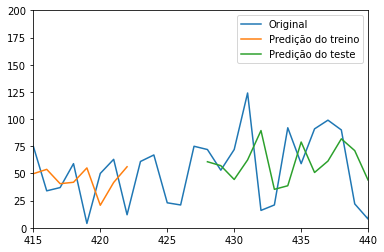

In [30]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_cases), label='Original')
plt.plot(trainPredictPlot , label='Predição do treino')
plt.plot(testPredictPlot, label='Predição do teste')
#plt.plot(scaler.inverse_transform([trainY]), label='?')
plt.xlim(415,440)
plt.ylim(0, 200)
plt.legend()
plt.show()

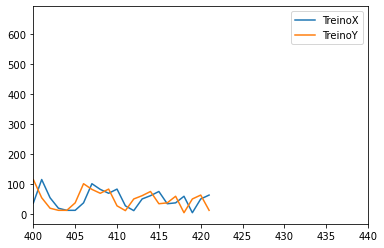

In [87]:
plt.plot(scaler.inverse_transform(trainX) , label='TreinoX')
plt.plot(scaler.inverse_transform(numpy.reshape(trainY, (trainY.shape[0], 1))), label='TreinoY')
#plt.plot(scaler.inverse_transform([trainY]), label='?')
plt.xlim(400,440)
# plt.ylim(0, 200)
plt.legend()
plt.show()

In [41]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import LambdaCallback, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import pandas as pd

url_repo = 'https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv'
url_repo = 'dados_covid_sp.csv'
df_loaded = pd.read_csv(url_repo, delimiter=';', usecols=['nome_munic','casos_novos','datahora'])
data = {'city':'Indaiatuba'}
df_filtered = df_loaded[df_loaded.nome_munic==data['city']]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

df_cases = df_filtered[:]['casos_novos'].values.astype('float32')
df_cases = df_cases.reshape(len(df_cases),1)

scaler = MinMaxScaler(feature_range=(0, 1))
df_cases = scaler.fit_transform(df_cases)


In [42]:
train_size = int(len(df_cases) * 0.8)
test_size = len(df_cases) - train_size
train, test = df_cases[0:train_size, :], df_cases[train_size:len(df_cases)+1, :]
print(len(train), len(test))

414 104


In [43]:
look_back = 7
trainX, trainY = create_dataset(df_cases, look_back)
testX, testY = create_dataset(df_cases, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [44]:
hidden_nodes = int(2/3 * look_back)
model = Sequential()
model.add(LSTM(hidden_nodes, input_shape=(1, look_back)))
model.add(Dropout(0.0055))
model.add(Dense(hidden_nodes*2))
#model.add(Dropout(0.0055))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=1)

Epoch 1/30
511/511 [==============================] - 1s 713us/step - loss: 0.0182
Epoch 2/30
511/511 [==============================] - 0s 734us/step - loss: 0.0094
Epoch 3/30
511/511 [==============================] - 0s 707us/step - loss: 0.0162
Epoch 4/30
511/511 [==============================] - 0s 695us/step - loss: 0.0062
Epoch 5/30
511/511 [==============================] - 0s 738us/step - loss: 0.0078
Epoch 6/30
511/511 [==============================] - 0s 697us/step - loss: 0.0077
Epoch 7/30
511/511 [==============================] - 0s 704us/step - loss: 0.0061
Epoch 8/30
511/511 [==============================] - 0s 716us/step - loss: 0.0069
Epoch 9/30
511/511 [==============================] - 0s 686us/step - loss: 0.0062
Epoch 10/30
511/511 [==============================] - 0s 717us/step - loss: 0.0039
Epoch 11/30
511/511 [==============================] - 0s 703us/step - loss: 0.0078
Epoch 12/30
511/511 [==============================] - 0s 694us/step - loss: 0.0052
E

In [45]:
score = model.summary()
print(score)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 4)                 192       
_________________________________________________________________
dropout_4 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Train Score: %.2f MAE' % (testScore))

Train Score: 51.83 RMSE
Train Score: 34.31 MAE
Test Score: 51.83 RMSE
Train Score: 34.31 MAE


In [47]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_cases)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
print(look_back,len(trainPredict),len(df_cases))

7 511 518


In [48]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_cases)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_cases)-1, :] = testPredict

ValueError: could not broadcast input array from shape (511,1) into shape (0,1)

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_cases), label='Original')
plt.plot(trainPredictPlot , label='Predição do treino')
plt.plot(testPredictPlot, label='Predição do teste')
#plt.plot(scaler.inverse_transform([trainY]), label='?')
plt.xlim(415,440)
plt.ylim(0, 200)
plt.legend()
plt.show()

NameError: name 'plt' is not defined

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lstm_14 (LSTM)               (None, 4)                 192       
_________________________________________________________________
dropout_7 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 40        
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
=================================================================
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________
None

Train Score: 48.76 RMSE

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lstm (LSTM)                  (None, 4)                 128       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
=================================================================
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
None

Train Score: 52.45 RMSE - Root Mean Squared Error

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lstm_3 (LSTM)                (None, 3)                 84        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
=================================================================
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________
None

Train Score: 52.48 RMSE

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lstm_1 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
=================================================================
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None

Train Score: 52.59 RMSE

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lstm_2 (LSTM)                (None, 7)                 308       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
=================================================================
Total params: 316
Trainable params: 316
Non-trainable params: 0
_________________________________________________________________
None

Train Score: 52.65 RMSE

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lstm_1 (LSTM)                (None, 4)                 192       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
=================================================================
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None

Train Score: 50.81 RMSE

In [66]:
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
x = model.predict(df_cases[-7:].reshape(1, 1, 7))
testPredict = scaler.inverse_transform(x)
testPredict

array([[90.316154]], dtype=float32)

In [86]:
cases = df_cases[-7:]
new=np.append(cases,testPredict,axis=0)
cases

array([[0.1149773 ],
       [0.16944024],
       [0.12708017],
       [0.17851739],
       [0.02118003],
       [0.00907716],
       [0.16641451]], dtype=float32)

In [83]:
new

array([[1.1497730e-01],
       [1.6944024e-01],
       [1.2708017e-01],
       [1.7851739e-01],
       [2.1180030e-02],
       [9.0771560e-03],
       [1.6641451e-01],
       [9.0316154e+01]], dtype=float32)

In [85]:
np.delete(new, 0, axis=0)

array([[1.6944024e-01],
       [1.2708017e-01],
       [1.7851739e-01],
       [2.1180030e-02],
       [9.0771560e-03],
       [1.6641451e-01],
       [9.0316154e+01]], dtype=float32)

In [11]:
cases = df_cases[-7:]
for _ in range(7):
    pred_day = model.predict(cases.reshape(1, 1, 7))
    cases = np.append(cases,pred_day,axis=0)
    cases = np.delete(cases, 0, axis=0)
eissoae = np.append(df_cases[-7:],cases,axis=0)

In [128]:
eissoae

array([[0.1149773 ],
       [0.16944024],
       [0.12708017],
       [0.17851739],
       [0.02118003],
       [0.00907716],
       [0.16641451],
       [0.13663563],
       [0.1290283 ],
       [0.113158  ],
       [0.11562242],
       [0.06924921],
       [0.06873225],
       [0.10365728]], dtype=float32)

In [132]:
predis = scaler.inverse_transform(eissoae[-7:])
predis = np.round(predis).astype(int)

In [133]:
predis

array([[90],
       [85],
       [75],
       [76],
       [46],
       [45],
       [69]])

In [136]:
for e in predis:
    print(int(e))

90
85
75
76
46
45
69


In [12]:
x = df_filtered[-len(cases):]['datahora']

In [15]:
scaler.inverse_transform(df_cases[-7:])

array([[ 76.       ],
       [112.       ],
       [ 84.       ],
       [118.       ],
       [ 14.       ],
       [  6.0000005],
       [110.       ]], dtype=float32)

In [13]:
x

339505    2021-08-04
340150    2021-08-05
340795    2021-08-06
341440    2021-08-07
342085    2021-08-08
342730    2021-08-09
343375    2021-08-10
Name: datahora, dtype: object

In [105]:
from datetime import datetime, timedelta

In [124]:
y = datetime.now()
y

datetime.datetime(2021, 8, 10, 20, 58, 14, 191347)

In [120]:
y = y.strftime("%Y-%m-%d")

In [121]:
x

array(['2021-08-04', '2021-08-05', '2021-08-06', '2021-08-07',
       '2021-08-08', '2021-08-09', '2021-08-10'], dtype=object)

In [122]:
if y in x:
    print(1)

1


In [126]:
y += timedelta(days=1)

In [127]:
y

datetime.datetime(2021, 8, 11, 20, 58, 14, 191347)